In [2]:
# Import libraries
import pandas as pd
import numpy as np
import os

In [3]:
#Import Visualization Libraries
import seaborn as sns
import scipy

In [4]:
import matplotlib.pyplot as plt

In [5]:
# import DF

ords_prods_merge = pd.read_pickle(r'C:\Users\18179\Documents\CareerFoundry\InstaCart Basket Analysis\02 Data\Prepared Data\orders_products_merged_4_8.pkl')

<AxesSubplot:>

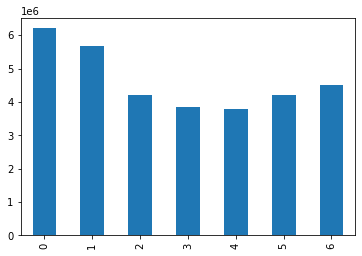

In [6]:
#Create bar plot & chronologically ordered

ords_prods_merge['order_day_of_week'].value_counts().sort_index().plot.bar()

<AxesSubplot:>

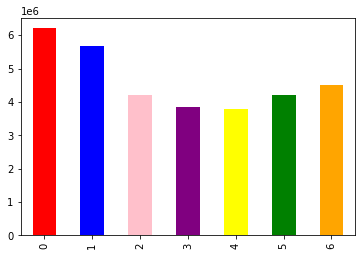

In [7]:
#with color

ords_prods_merge['order_day_of_week'].value_counts().sort_index().plot.bar(color =['red', 'blue', 'pink', 'purple', 'yellow', 'green', 'orange', 'blue'])

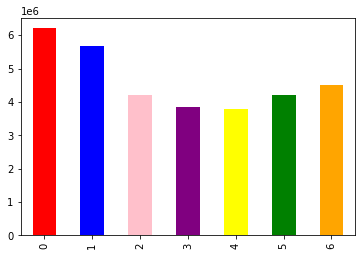

In [8]:
#Save chart in Jupyter

bar = ords_prods_merge['order_day_of_week'].value_counts().sort_index().plot.bar(color =['red', 'blue', 'pink', 'purple', 'yellow', 'green', 'orange', 'blue'])

In [9]:
#Export 

In [15]:
#Save figure

bar.figure.savefig(os.path.join(r"C:\Users\18179\Documents\CareerFoundry\InstaCart Basket Analysis\04 Analysis\Visualizations", 'bar_order_dow.png'))

<AxesSubplot:ylabel='Frequency'>

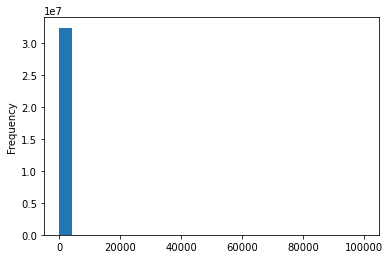

In [16]:
#create histogram of prices

ords_prods_merge['prices'].plot.hist(bins = 25)

<AxesSubplot:xlabel='prices', ylabel='prices'>

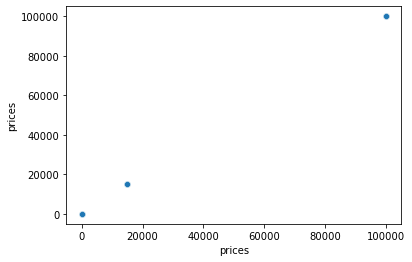

In [17]:
#scatter plot

sns.scatterplot(x= 'prices', y = 'prices', data = ords_prods_merge)

In [20]:
#Investigate

ords_prods_merge.loc[ords_prods_merge['prices'] > 100]

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,Unnamed: 0,product_name,aisle_id,department_id,prices,_merge,price_range_loc,busiest_day,Busiest Days,busiest_period_of_day,max_order,loyalty_flag,spending,spending_flag,frequency,order_frequency_flag
10030345,912404,17,12,2,14,5.0,21553,5,0,21554,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,both,High_range_product,Regular busy,Regular day,Most orders,40,Regular customer,108.648299,High spender,5.0,Frequent customer
10030346,603376,17,22,6,16,4.0,21553,3,1,21554,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,both,High_range_product,Regular busy,Regular day,Most orders,40,Regular customer,108.648299,High spender,5.0,Frequent customer
10030347,3264360,135,2,2,21,13.0,21553,6,0,21554,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,both,High_range_product,Regular busy,Regular day,Fewest orders,4,New customer,1154.792308,High spender,12.0,Regular customer
10030348,892534,135,3,0,8,12.0,21553,3,1,21554,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,both,High_range_product,Busiest day,Busiest days,Average orders,4,New customer,1154.792308,High spender,12.0,Regular customer
10030349,229704,342,8,1,19,30.0,21553,9,0,21554,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,both,High_range_product,Regular busy,Busiest days,Average orders,16,Regular customer,114.426619,High spender,23.0,Non-frequent customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29166209,2249946,204099,29,0,8,4.0,33664,1,0,33666,2 % Reduced Fat Milk,84,16,99999.0,both,High_range_product,Busiest day,Busiest days,Average orders,39,Regular customer,1106.743956,High spender,4.0,Frequent customer
29166210,2363282,204099,31,0,9,2.0,33664,1,1,33666,2 % Reduced Fat Milk,84,16,99999.0,both,High_range_product,Busiest day,Busiest days,Most orders,39,Regular customer,1106.743956,High spender,4.0,Frequent customer
29166211,3181945,204395,13,3,15,8.0,33664,25,0,33666,2 % Reduced Fat Milk,84,16,99999.0,both,High_range_product,Regular busy,Slowest days,Most orders,15,Regular customer,451.153540,High spender,5.0,Frequent customer
29166212,2486215,205227,7,3,20,4.0,33664,8,0,33666,2 % Reduced Fat Milk,84,16,99999.0,both,High_range_product,Regular busy,Slowest days,Average orders,12,Regular customer,1178.381871,High spender,12.0,Regular customer


In [19]:
pd.options.display.max_columns = None

In [21]:
#Turn high prices into Nan

ords_prods_merge.loc[ords_prods_merge['prices'] > 100, 'prices'] = np.nan

In [22]:
#Check for new max value

ords_prods_merge['prices'].max()

25.0

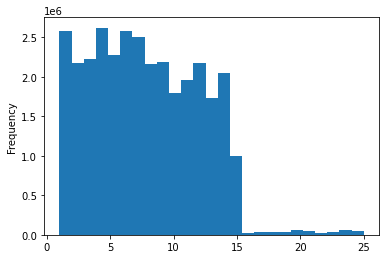

In [23]:
#New Histogram

hist = ords_prods_merge['prices'].plot.hist(bins = 25)

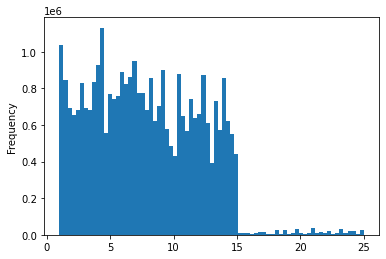

In [24]:
#Increase granularity

hist = ords_prods_merge['prices'].plot.hist(bins = 75)

In [26]:
#Save histogram

hist.figure.savefig(os.path.join(r"C:\Users\18179\Documents\CareerFoundry\InstaCart Basket Analysis\04 Analysis\Visualizations", 'hist_prices.png'))

In [10]:
#Create list of true/ false values to test np.random.rand() <=.7

dev = np.random.rand(len(ords_prods_merge)) <= 0.7

In [11]:
#store 70% of sample in df Big

big = ords_prods_merge[dev]

In [12]:
#store 30% of sample in df small

small = ords_prods_merge[~dev]

In [13]:
#test
len(ords_prods_merge)

32404859

In [14]:
len(big) + len(small)

32404859

In [15]:
#reduce to neccessary samples

df_2 = small[['order_day_of_week', 'prices']]

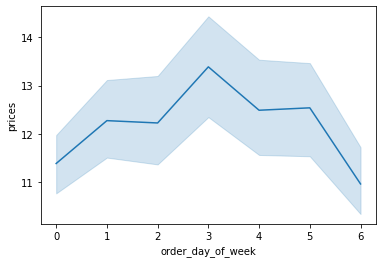

In [16]:
#create line chart

line = sns.lineplot(data = df_2, x = 'order_day_of_week', y = 'prices')

In [17]:
line.figure.savefig(os.path.join(r"C:\Users\18179\Documents\CareerFoundry\InstaCart Basket Analysis\04 Analysis\Visualizations", 'line_price_dow.png'))

In [19]:
df_3 = small[['order_hour_of_day', 'prices']]

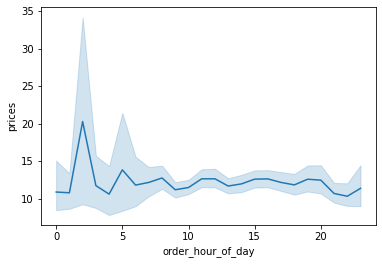

In [24]:
hour_prices_line = sns.lineplot(data = df_3, x = 'order_hour_of_day', y = 'prices')

In [25]:
hour_prices_line.figure.savefig(os.path.join(r"C:\Users\18179\Documents\CareerFoundry\InstaCart Basket Analysis\04 Analysis\Visualizations", 'hour_prices_line.png'))